# Soccer Results 1872 - 2022  
Uko Etukho  
December 2022  


## Introduction
Soccer is one of the sports that enjoys a lot of followership worldwide, with the World Cup being the most popular soccer event.This project looks at the outcomes of soccer events worldwide, with respect to selected tournaments and events.  
  
  The dataset used for this project is the 'International Football from 1872 to 2022' dataset on Kaggle, owned by Aman Chauhan and licenced under CC0: Public Domain.  
  
  At the end of this project I want to see,  
  * How many matches has Nigeria won at home?  
  * How many matches has Nigeria won away from home? 
  * How many matches has Nigeria won in African Cup of Nations, World Cup, Friendlies?  
    
Python and Tableau will be the tools used for this project.  
  
  Dataset column descriptions:
* date - date of the match
* home_team - the name of the home team
* away_team - the name of the away team
* home_score - full-time home team score including extra time, not including penalty-shootouts
* away_score - full-time away team score including extra time, not including penalty-shootouts
* tournament - the name of the tournament
* city - the name of the city/town/administrative unit where the match was played
* country - the name of the country where the match was played
* neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


In [10]:
import pandas as pd
import numpy as np
import missingno as msno

In [3]:
df = pd.read_csv('results.csv')

In [16]:
print(df.shape)
df.head()

(44060, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [52]:
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False
44058,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Athens,Greece,False
44059,2022-09-30,Fiji,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Luganville,Vanuatu,True


## Data Wrangling

The datset has been checked for duplicates and missing values, and one row of data has been removed for missing values.  
  The date column datatype has been changed from object type to datetime datatype.  
  Dataset has also been checked for possible data inconsistencies.  


In [53]:
# check for duplicates
df.duplicated().sum()

0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44060 entries, 0 to 44059
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44060 non-null  object 
 1   home_team   44060 non-null  object 
 2   away_team   44060 non-null  object 
 3   home_score  44059 non-null  float64
 4   away_score  44059 non-null  float64
 5   tournament  44060 non-null  object 
 6   city        44060 non-null  object 
 7   country     44060 non-null  object 
 8   neutral     44060 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


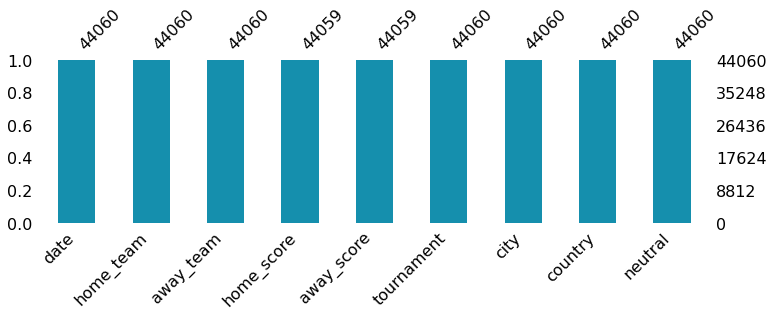

In [14]:
msno.bar(df, figsize = (12,3),color = "#158FAD")
plt.show()

In [55]:
# check for null objects
df['home_score'].isna().sum()

1

In [56]:
# remove row with null values
df = df.dropna(subset=['home_score', 'away_score'])

In [57]:
# convert column 'date' to date format
df['date'] = df['date'].astype('datetime64')

In [58]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score           float64
away_score           float64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [59]:
df['tournament'].unique()


array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Juan Pinto Durán', 'Arab Cup',
       'South Pacific Ga

In [60]:
df['tournament'].value_counts()

Friendly                                17425
FIFA World Cup qualification             7774
UEFA Euro qualification                  2593
African Cup of Nations qualification     1932
FIFA World Cup                            900
                                        ...  
Copa América qualification                  2
FIFA 75th Anniversary Cup                   1
Real Madrid 75th Anniversary Cup            1
TIFOCO Tournament                           1
Copa Confraternidad                         1
Name: tournament, Length: 139, dtype: int64

In [61]:
# check home_score values
df['home_score'].unique()

array([ 0.,  4.,  2.,  3.,  1.,  7.,  9.,  5.,  6.,  8., 11., 13., 12.,
       10., 15., 14., 21., 30., 24., 18., 16., 19., 20., 17., 22., 31.])

In [62]:
# check away_score values
df['away_score'].unique()

array([ 0.,  2.,  1.,  3.,  4.,  6.,  5., 13.,  8.,  7., 10.,  9., 11.,
       12., 15., 18., 16., 14., 19., 20., 17., 21.])

## Data Transformation  
  
  Transformations have been carried out on the dataset including;  
  * Creating new numerical columns,
  * Converting 'neutral' column boolean values to strings,  
  * Filtering the dataset for selected tournaments and events.
      
    

In [63]:
df['home_win'] = df['home_score']>df['away_score']
df['away_win'] = df['home_score']<df['away_score']
df['home_loss'] = df['home_score']<df['away_score']
df['away_loss'] = df['home_score']>df['away_score']
df['draw'] = df['home_score']==df['away_score']

df[['home_win','away_win','home_loss','away_loss','draw']] = df[['home_win','away_win','home_loss','away_loss','draw']].astype(int)

In [64]:
# change 'neutral' column to string
df['neutral'] = df['neutral'].map({True:'Neutral Ground',False:'Not Neutral Ground'})
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,home_loss,away_loss,draw
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,Not Neutral Ground,0,0,0,0,1
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,Not Neutral Ground,1,0,0,1,0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,Not Neutral Ground,1,0,0,1,0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,Not Neutral Ground,0,0,0,0,1
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,Not Neutral Ground,1,0,0,1,0


In [65]:
# filter the most popular tournaments and events
filter_list = ['Friendly','FIFA World Cup','FIFA World Cup qualification','UEFA Euro','UEFA Euro qualification',
               'African Cup of Nations','African Cup of Nations qualification']

events = df[df.tournament.isin(filter_list)]

In [66]:
events['tournament'].value_counts()

Friendly                                17425
FIFA World Cup qualification             7774
UEFA Euro qualification                  2593
African Cup of Nations qualification     1932
FIFA World Cup                            900
African Cup of Nations                    742
UEFA Euro                                 337
Name: tournament, dtype: int64

## Tableau

The cleaned and transformed dataset is now saved for further upload to Tableau for Analysis and Visualization.  



In [67]:
#events.to_csv('events.csv')

#### Tableau Dashboard

In [68]:
%%html
<div class='tableauPlaceholder' id='viz1670496578522' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SoccerResults1872-2022&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SoccerResults1872-2022&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SoccerResults1872-2022&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1670496578522');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1200px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1200px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

[View on Tableau](https://public.tableau.com/app/profile/uko.etukho/viz/SoccerResults1872-2022/Dashboard2)

## Conclusion  
* Nigeria has won a total of 131 home games and 68 away games.  
* A total of 54 African Cup of Nations games, same as Ghana and only behind Egypt with 60 goals.

#### Notes:  
This project does not account for the fact that tournaments are played on neutral grounds for most countries while still being listed as 'home teams' as there has to be a home team and an away team.  
  
  However, the ***Playground filter*** on the dashboard gives precise playing ground conditions for precise results.